In [72]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


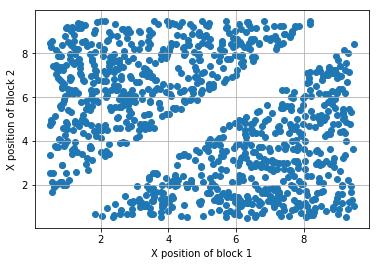

In [108]:
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt("data/uniform_feasible_1d_2ships.csv", delimiter=",")
pts = np.vstack([data[:, 0], data[:, 3]]) 
plt.scatter(pts[0, :], pts[1, :])
plt.xlabel("X position of block 1")
plt.ylabel("X position of block 2")
plt.grid(True)

In [116]:
# Use KDE with gaussian kernels to estimate density
# (This is sort of like a mixture of gaussians, except
# putting one at every 
import statsmodels.api as sm
kernel = sm.nonparametric.KDEMultivariate(data=[pts[0, :], pts[1, :]],var_type='cc', bw='cv_ml')

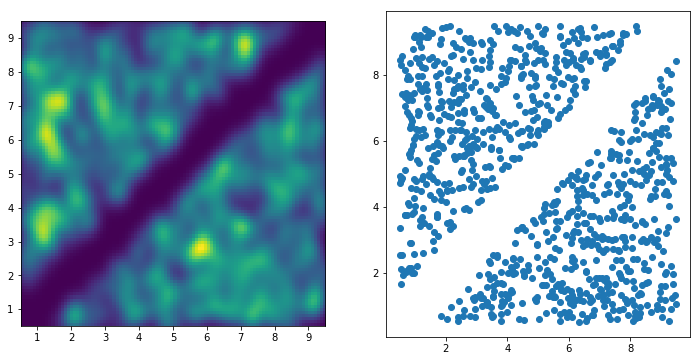

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
xmin, ymin = np.min(pts, axis=1)
xmax, ymax = np.max(pts, axis=1)
X, Y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
positions = np.vstack([X.ravel(), Y.ravel()])
p = np.reshape(kernel.pdf(positions).T, X.shape)
ax1.imshow(np.rot90(p), extent=[xmin, xmax, ymin, ymax])
ax2.scatter(pts[0, :], pts[1, :]);

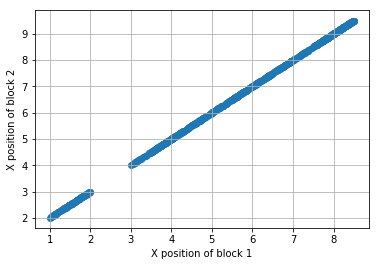

In [117]:
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt("data/uniform_feasible_1d_2ships_onlytouching.csv", delimiter=",")
pts = np.vstack([data[:, 0], data[:, 3]])
pts = np.vstack([data[:, 0], data[:, 3]])
plt.scatter(pts[0, :], pts[1, :])
plt.xlabel("X position of block 1")
plt.ylabel("X position of block 2")
plt.grid(True)

LinAlgError: singular matrix

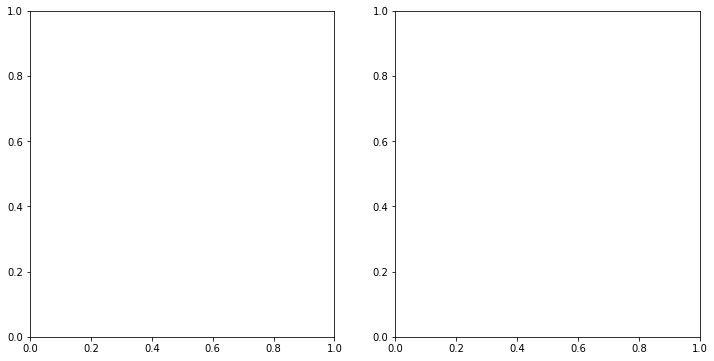

In [118]:
# Use KDE with gaussian kernels to estimate density
# (This is sort of like a mixture of gaussians, except
# putting one at every 
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
kernel = sp.stats.gaussian_kde(pts)
xmin, ymin = np.min(pts, axis=1)
xmax, ymax = np.max(pts, axis=1)
X, Y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
positions = np.vstack([X.ravel(), Y.ravel()])
p = np.reshape(kernel(positions).T, X.shape)
ax1.imshow(np.rot90(p), extent=[xmin, xmax, ymin, ymax])
ax2.scatter(pts[0, :], pts[1, :]);